<a href="https://colab.research.google.com/github/shinzokuro/Cnn/blob/alex/alexnet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [2]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

In [3]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

170508288/170498071 [==============================] - 3s 0us/step
((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [4]:
!pip install tensorflow

In [5]:
from tensorflow import keras as k

In [6]:
y_train = k.utils.to_categorical(y_train, num_classes=10)
y_val = k.utils.to_categorical(y_val, num_classes=10)
y_test = k.utils.to_categorical(y_test, num_classes=10)

In [7]:

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [9]:
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='accuracy',   factor=.01,   patience=3,  min_lr=1e-5) 

In [10]:
batch_size= 100
epochs=100
learn_rate=.001

In [11]:
AlexNet.fit(train_generator.flow(x_train, y_train, batch_size=batch_size),
                      epochs = epochs, 
                      steps_per_epoch = x_train.shape[0]//batch_size, 
                      validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size),
                      validation_steps = 250, callbacks = [lrr], verbose=1)


Epoch 1/100
350/350 [==============================] - 76s 81ms/step - loss: 1.8113 - accuracy: 0.3408 - val_loss: 2.4206 - val_accuracy: 0.1963
Epoch 2/100
350/350 [==============================] - 17s 48ms/step - loss: 1.4298 - accuracy: 0.4958
Epoch 3/100
350/350 [==============================] - 17s 48ms/step - loss: 1.2992 - accuracy: 0.5474
Epoch 4/100
350/350 [==============================] - 17s 48ms/step - loss: 1.2081 - accuracy: 0.5840
Epoch 5/100
350/350 [==============================] - 17s 48ms/step - loss: 1.1208 - accuracy: 0.6133
Epoch 6/100
350/350 [==============================] - 17s 48ms/step - loss: 1.0592 - accuracy: 0.6392
Epoch 7/100
350/350 [==============================] - 17s 47ms/step - loss: 1.0182 - accuracy: 0.6502
Epoch 8/100
350/350 [==============================] - 17s 47ms/step - loss: 0.9608 - accuracy: 0.6697
Epoch 9/100
350/350 [==============================] - 17s 47ms/step - loss: 0.9238 - accuracy: 0.6828
Epoch 10/100
350/350 [=========

In [43]:
from keras_preprocessing.image import array_to_img
f = x_test[1][:][:][:]
f = array_to_img(f)

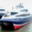

In [44]:
f

In [31]:
y = x_test[0]
y = y.reshape(1,32,32,3)
r = np.argmax(AlexNet.predict(x_test), axis=-1)

In [35]:
r.shape

(10000,)

In [42]:
r

array([3, 8, 8, ..., 5, 2, 7])